In [112]:
import matplotlib.pyplot as plt
#from sklearn import linear_model
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

Carga de Datos

In [113]:
lineal = pd.read_csv("C:/analisis/rlogistica.csv", sep=",")

In [114]:
lineal.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [115]:
lineal.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [116]:
print(lineal.groupby('diabetes').size())

diabetes
0    4129
1     109
dtype: int64


Modelo de regresión Logística

In [117]:
X = lineal.drop("diabetes", axis=1)  # Características
y = lineal["diabetes"]  # Variable objetivo

In [118]:
#correccion de valores vacios
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Estandarización de características
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [119]:
# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [120]:
pred = model.predict(X)
print(f"{pred[:100]}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [121]:
model.score(X,y)

0.9872581406323737

Validacion del modelo

In [122]:
validation_size = 0.2
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [123]:
print(f"Precisión:\n")
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f" {accuracy}")

Precisión:

 0.9846698113207547


Resultados del Modelo

In [124]:
print(f"Matriz de confusión:\n")
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"{conf_matrix}")

Matriz de confusión:

[[823   1]
 [ 12  12]]


In [125]:
print(f"Informe de clasificación:\n")
report = classification_report(y_test, y_pred)
print(f"{report}")

Informe de clasificación:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       824
           1       0.92      0.50      0.65        24

    accuracy                           0.98       848
   macro avg       0.95      0.75      0.82       848
weighted avg       0.98      0.98      0.98       848



lineal.plot.scatter(x='BMI',y='diabetes')
plt.plot(x, y, '-r')
plt.ylim(0,lineal['diabetes'].max()*1.1)
plt.show()Graficas

Graficos

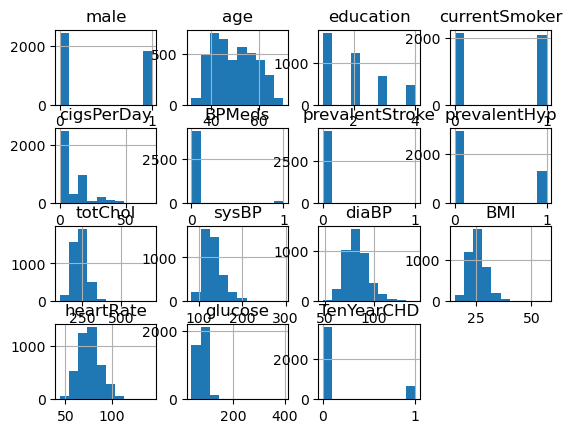

In [126]:
lineal.drop(['diabetes'],axis=1).hist()
plt.show()

In [127]:
lineal[['BMI','diabetes']].head()

,BMI,diabetes
0,26.97,0
1,28.73,0
2,25.34,0
3,28.58,0
4,23.10,0


<Axes: xlabel='BMI', ylabel='diabetes'>

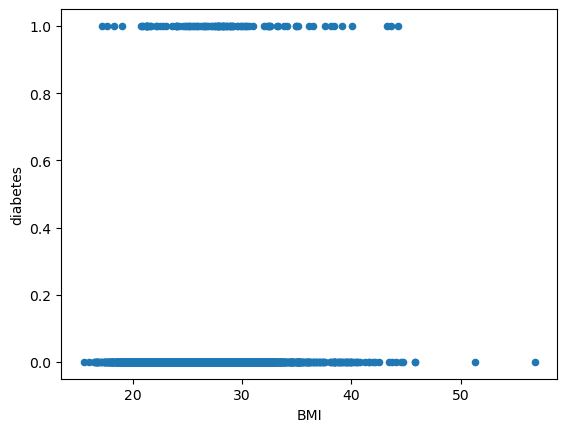

In [128]:
lineal[['BMI','diabetes']].plot.scatter(x='BMI',y='diabetes')

In [129]:
w = 0.11
b = -3.4

In [130]:
x = np.linspace(0,lineal['BMI'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

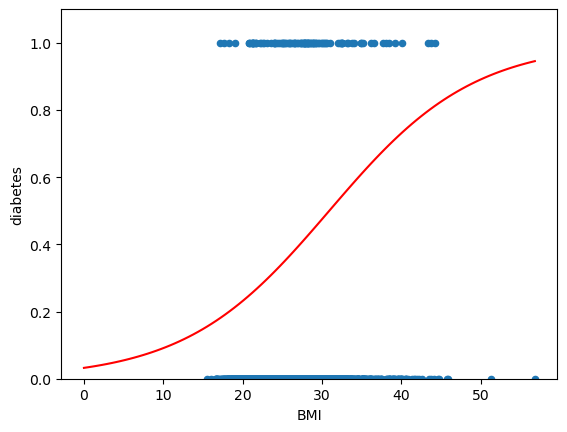

In [131]:
lineal.plot.scatter(x='BMI',y='diabetes')
plt.plot(x, y, '-r')
plt.ylim(0,lineal['diabetes'].max()*1.1)
plt.show()